<font size="5"><b>A) KNN(Sklearn) Without using feature scaling  :</b></font>

In [1]:
# after removing data row as index row and changing column names
import pandas as pd
import numpy as np
df=pd.read_csv('C:\\Users\\soham\\Downloads\\adult.data',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'],header=None)
df 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
#replacing "?" by np.nan
df=df.replace(' ?',np.nan)
#replace missing values by mean,mode
for i in df.columns:
    if (type(df[i].dropna().tolist()[0])==str): #we are checking type of first value of each column after dropping NA's from it.
        df[i]=df[i].fillna(df[i].mode()[0])   #So, no problem even if first value of column turns out to be missing
    elif (type(df[i].dropna().tolist()[0])==float):  #we are checking type of first available element of that column using dropna 
        df[i]=df[i].fillna(df[i].mean())
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
#creating a dataframe with only integer/numerical type columns
dfint=pd.DataFrame()
for i in df.columns:
    if (type(df[i].tolist()[0])==int):
        dfint[i]=df[i].tolist()
dfint

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
5,37,284582,14,0,0,40
6,49,160187,5,0,0,16
7,52,209642,9,0,0,45
8,31,45781,14,14084,0,50
9,42,159449,13,5178,0,40


In [4]:
#performing train-test-split on our dataframe
# X consists of only integer type columns, y consists of output column("income")
import numpy as np
from sklearn.model_selection import train_test_split
X, y = dfint.iloc[:,:],df.iloc[:,[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [5]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
11928,45,249935,13,0,0,60
25343,32,188154,10,0,0,40
3107,61,124971,16,0,0,40
19279,32,190784,10,0,0,40
24666,35,175769,9,0,0,65
22392,40,261497,9,0,0,35
24426,39,147500,9,0,0,40
29290,22,171419,11,0,0,40
4174,17,114798,7,0,0,18
9126,68,193666,16,20051,0,55


In [6]:
X_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
32264,32,260954,7,0,2042,30
28024,31,236391,10,0,0,40
9347,59,175689,10,0,0,14
10427,37,114765,10,0,0,40
4810,40,179717,13,0,1564,60
11139,35,167062,9,0,0,40
20926,22,142566,9,0,0,40
24150,35,114366,13,0,0,40
15504,23,238092,13,0,0,40
9407,42,175935,9,0,1980,46


In [7]:
X = X_train.iloc[:,:]
y = y_train['income']
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
neigh.classes_

array([' <=50K', ' >50K'], dtype=object)

In [9]:
neigh.predict_proba(X_test.iloc[[0]])

array([[0.33333333, 0.66666667]])

In [10]:
neigh.predict(X_test.iloc[[0]])

array([' >50K'], dtype=object)

In [11]:
neigh.predict_proba(X_test.iloc[:,:])

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       ...,
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ]])

In [12]:
neigh.predict(X_test.iloc[:,:])

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype=object)

In [13]:
neigh.score(X_test.iloc[:,:], y_test['income'])

0.7558603746545194

<font size="5"><b>B) KNN(Sklearn) After applying feature scaling(Sklearn) :</b></font>

In [14]:
from sklearn.preprocessing import StandardScaler
data = X_train
scaler = StandardScaler()


In [15]:
scaler.fit_transform(data)

array([[ 0.47241468,  0.56215446,  1.13264951, -0.14679622, -0.21831151,
         1.5935802 ],
       [-0.48175361, -0.0210279 , -0.03719495, -0.14679622, -0.21831151,
        -0.02969935],
       [ 1.64677564, -0.61744445,  2.30249396, -0.14679622, -0.21831151,
        -0.02969935],
       ...,
       [ 3.4083171 , -0.22989593, -0.4271431 , -0.14679622, -0.21831151,
         0.78194042],
       [-0.18816337,  2.63054931, -0.4271431 , -0.14679622, -0.21831151,
        -1.24715901],
       [-0.92213897,  0.07345216,  1.52259766, -0.14679622, -0.21831151,
        -0.02969935]])

In [16]:
X_train = pd.DataFrame(scaler.fit_transform(data),index=X_train.index, columns=X_train.columns)
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
11928,0.472415,0.562154,1.132650,-0.146796,-0.218312,1.593580
25343,-0.481754,-0.021028,-0.037195,-0.146796,-0.218312,-0.029699
3107,1.646776,-0.617444,2.302494,-0.146796,-0.218312,-0.029699
19279,-0.481754,0.003798,-0.037195,-0.146796,-0.218312,-0.029699
24666,-0.261561,-0.137936,-0.427143,-0.146796,-0.218312,1.999400
22392,0.105427,0.671294,-0.427143,-0.146796,-0.218312,-0.435519
24426,0.032029,-0.404782,-0.427143,-0.146796,-0.218312,-0.029699
29290,-1.215729,-0.178998,0.352753,-0.146796,-0.218312,-0.029699
4174,-1.582717,-0.713473,-1.207039,-0.146796,-0.218312,-1.815307
9126,2.160559,0.031003,2.302494,2.611506,-0.218312,1.187760


In [17]:
X_test = pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns=X_test.columns)
X_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
32264,-0.481754,0.666168,-1.207039,-0.146796,4.830654,-0.841339
28024,-0.555151,0.434306,-0.037195,-0.146796,-0.218312,-0.029699
9347,1.499981,-0.138691,-0.037195,-0.146796,-0.218312,-2.139963
10427,-0.114766,-0.713784,-0.037195,-0.146796,-0.218312,-0.029699
4810,0.105427,-0.100669,1.132650,-0.146796,3.648771,1.593580
11139,-0.261561,-0.220126,-0.427143,-0.146796,-0.218312,-0.029699
20926,-1.215729,-0.451356,-0.427143,-0.146796,-0.218312,-0.029699
24150,-0.261561,-0.717550,1.132650,-0.146796,-0.218312,-0.029699
15504,-1.142332,0.450362,1.132650,-0.146796,-0.218312,-0.029699
9407,0.252222,-0.136369,-0.427143,-0.146796,4.677356,0.457285


In [18]:
#X1,y1,neigh1 for knn after feature scaling
X1 = X_train.iloc[:,:]
y1 = y_train['income']
from sklearn.neighbors import KNeighborsClassifier
neigh1 = KNeighborsClassifier(n_neighbors=3)
neigh1.fit(X1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
neigh1.score(X_test.iloc[:,:], y_test['income'])

0.7901525232879517

<font size="5"><b>C) KNN(Sklearn) by Varying the value of 'K' for best accuracy :</b></font>

In [20]:
def best_accuracy(X_training,y_training,X_testing,y_testing,opcol,k_range):
    acc={}
    for k in range(1,k_range):
        neighk = KNeighborsClassifier(n_neighbors=k)
        neighk.fit(X_training,y_training[opcol])
        acc[k]=neighk.score(X_testing,y_testing[opcol])
    print(max(acc,key=acc.get))
    #return max(acc,key=acc.get)
    return acc

accuracy_dict = best_accuracy( X_train.iloc[:,:], y_train, X_test.iloc[:,:], y_test,'income', 30)
accuracy_dict

27


{1: 0.7618998873989149,
 2: 0.7990582454703654,
 3: 0.7901525232879517,
 4: 0.8105230832224384,
 5: 0.8036646534957519,
 6: 0.8140034803971747,
 7: 0.8082710615211383,
 8: 0.8140034803971747,
 9: 0.8101136247312929,
 10: 0.8152318558706111,
 11: 0.8143105742655339,
 12: 0.8178933360630566,
 13: 0.8170744190807657,
 14: 0.8201453577643566,
 15: 0.8180980653086294,
 16: 0.8187122530453476,
 17: 0.8178933360630566,
 18: 0.8169720544579793,
 19: 0.8185075237997748,
 20: 0.8185075237997748,
 21: 0.8207595455010749,
 22: 0.8200429931415703,
 23: 0.8200429931415703,
 24: 0.8208619101238612,
 25: 0.8199406285187839,
 26: 0.8207595455010749,
 27: 0.8216808271061521,
 28: 0.8207595455010749,
 29: 0.8209642747466476}

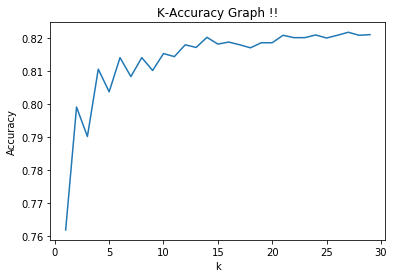

In [24]:
# importing the required module 
import matplotlib.pyplot as plt 

# x axis values 
x = list(accuracy_dict.keys())
# corresponding y axis values 
y = list(accuracy_dict.values())

# plotting the points 
plt.plot(x, y) 

# naming the x axis 
plt.xlabel('k') 
# naming the y axis 
plt.ylabel('Accuracy') 

# giving a title to my graph 
plt.title('K-Accuracy Graph !!') 

# function to show the plot 
plt.show() 


<font size="5"><b>D) KNN(Sklearn) by Varying the value of 'K' with Cross Validation :</b></font>

In [25]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def best_accuracy_kf(inp_df,op_df,opcol,k_range,kf_splits):
    X_kf = inp_df
    y_kf = op_df
    kf = KFold(n_splits=kf_splits)
    kf.get_n_splits(X_kf)
    acc={}
    for k in range(1,k_range):
        print('For K = ',k," :")
        acckf=[]
        for train_index, test_index in kf.split(X_kf):
            print("TRAIN:", train_index, "TEST:", test_index)
            X_train_kf, X_test_kf = X_kf.iloc[train_index], X_kf.iloc[test_index]
            y_train_kf, y_test_kf = y_kf.iloc[train_index], y_kf.iloc[test_index]
            X_train_kf = pd.DataFrame(scaler.fit_transform(X_train_kf),index=X_train_kf.index, columns=X_train_kf.columns)
            X_test_kf = pd.DataFrame(scaler.transform(X_test_kf),index=X_test_kf.index, columns=X_test_kf.columns)
            neighk = KNeighborsClassifier(n_neighbors=k)
            neighk.fit(X_train_kf,y_train_kf[opcol])
            acckf.append(neighk.score(X_test_kf,y_test_kf[opcol]))
            
        accavg=np.sum(acckf)/len(acckf)
        acc[k]=accavg
    print(max(acc,key=acc.get))
    #return max(acc,key=acc.get)
    return acc

accuracy_dict_kf = best_accuracy_kf( dfint.iloc[:,:],df.iloc[:,[-1]],'income', 30, 5)
accuracy_dict_kf

For K =  1  :
TRAIN: [ 6513  6514  6515 ... 32558 32559 32560] TEST: [   0    1    2 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 6513  6514  6515 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 26046 26047 26048] TEST: [26049 26050 26051 ... 32558 32559 32560]
For K =  2  :
TRAIN: [ 6513  6514  6515 ... 32558 32559 32560] TEST: [   0    1    2 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 6513  6514  6515 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 26046 26047 26048] TEST: [26049 26050 26051 ... 32558 32559 32560]
For K =  3  :


TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 26046 26047 26048] TEST: [26049 26050 26051 ... 32558 32559 32560]
For K =  18  :
TRAIN: [ 6513  6514  6515 ... 32558 32559 32560] TEST: [   0    1    2 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 6513  6514  6515 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 26046 26047 26048] TEST: [26049 26050 26051 ... 32558 32559 32560]
For K =  19  :
TRAIN: [ 6513  6514  6515 ... 32558 32559 32560] TEST: [   0    1    2 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 6513  6514  6515 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 19534 19535 19536]
TRAIN: [    

{1: 0.761094513863975,
 2: 0.8029544435981562,
 3: 0.7945087711554777,
 4: 0.8076532910365246,
 5: 0.8029544058735676,
 6: 0.8124136201232008,
 7: 0.8073770338740399,
 8: 0.8154848260387183,
 9: 0.8115537777214424,
 10: 0.8161298033304021,
 11: 0.8147477677417797,
 12: 0.8190166397501727,
 13: 0.8176653638479985,
 14: 0.8188015954483021,
 15: 0.8179724325682409,
 16: 0.8194158366314055,
 17: 0.8178802761138091,
 18: 0.8193236801769735,
 19: 0.8177881338060979,
 20: 0.8187094578561643,
 21: 0.8187709300733251,
 22: 0.8191394285705662,
 23: 0.8191394568640078,
 24: 0.8198458309236752,
 25: 0.8191395040197434,
 26: 0.8201836970549545,
 27: 0.8194158932182883,
 28: 0.8206136630537829,
 29: 0.8196308526398347}

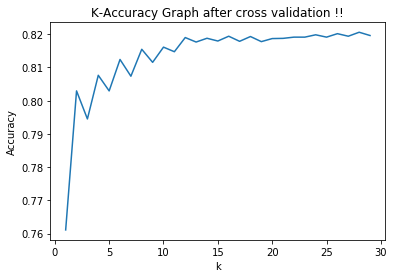

In [26]:
# importing the required module 
import matplotlib.pyplot as plt 

# x axis values 
x = list(accuracy_dict_kf.keys())
# corresponding y axis values 
y = list(accuracy_dict_kf.values())

# plotting the points 
plt.plot(x, y) 

# naming the x axis 
plt.xlabel('k') 
# naming the y axis 
plt.ylabel('Accuracy') 

# giving a title to my graph 
plt.title('K-Accuracy Graph after cross validation !!') 

# function to show the plot 
plt.show() 
